In [91]:
# Imports
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Session 1

## Exercise 1.1

Consider two boxes with white and black balls. Box 1 contains three black and five white balls and box 2 contains two black
and five white balls. First a box is chosen at random with a prior probability p(box = 1) = p(box = 2) = 0.5, secondly a
ball picked at random from that box. This ball turns out to be black. What is the posterior probability that this black ball
came from box 1?

In [29]:
def scalar_bayes(likelihood, prior, marginal):
    """Scalar verson of bayes theorem.

    Args:
        likelihood (Float): Likelihood of observation.
        prior (Float): Prior belief before observation.
        marginal (Float): Evidence (probability of observation).
    Return:
        posteriorn (Float): Posterior belief of event given observation.
    """
    return((likelihood*prior) / marginal)

likelihood_black_box1 = 3/8
likelihood_black_box2 = 2/7
pbox1 = 0.5
pbox2 = 0.5
marginal_black = (likelihood_black_box1*pbox1) + (likelihood_black_box2*pbox2)

p_box1_given_black = scalar_bayes(likelihood_black_box1, pbox1, marginal_black)

print("Posterior p(box1 | black) = {}".format(p_box1_given_black))

Posterior p(box1 | black) = 0.5675675675675675


## Exercise 1.2

Two fair coins are tossed. If two head occurs two white balls are placed in a 
box, if one head and one tail occurs one whiteball and one black ball are placed
in a box, and if two tails occurs two black balls are placed in the box. Balls 
are thendrawn from the box three times in succession, always with replacing the 
drawn ball back in the box. It is found that on allthree occasions a black ball 
is drawn. What is the probability that both balls in the box are black?

$$
X_1 = \text{Probability that fair coin is heads} = 
\begin{cases}
0 & \quad \text{tails} \\
1 & \quad \text{heads}
\end{cases} \sim \text{Ber}(p=0.5) = p^{x_1}(1 - p)^{1-x_1}
$$

$$
X_2 = \text{Probability that fair coin is heads} = 
\begin{cases}
0 & \quad \text{tails} \\
1 & \quad \text{heads}
\end{cases} \sim \text{Ber}(p=0.5) = p^{x_2}(1 - p)^{1-x_2}
$$

Since these two events are independent, their joint distribution is:

$$
P(X_1, X_2) = P(X_1)P(X_2) = p^{x_1+x_2}(1-p)^{-x_1-x_2+2}
$$


In [30]:
def f(x1, x2, p=0.5):
    return (p**(x1+x2) * (1-p)**(-x1-x2+2))

print("f(0,0) = {}".format(f(0,0)))
print("f(0,1) = {}".format(f(1,0)))
print("f(1,0) = {}".format(f(0,1)))
print("f(1,1) = {}".format(f(1,1)))

prior_2black = f(1, 1)
likelihood_draw3_2black = 1
marginal = 0*f(0, 0) + (1/2)**3 * (f(1, 0)+f(0, 1)) + 1**3 * f(1, 1)

posterior = scalar_bayes(likelihood_draw3_2black, prior_2black, marginal)
print("Posterior p(2 black | Draw 3 black) = {}".format(posterior))

f(0,0) = 0.25
f(0,1) = 0.25
f(1,0) = 0.25
f(1,1) = 0.25
Posterior p(2 black | Draw 3 black) = 0.8


## Exercise 1.3

let $P = 1$ denote percipitation and $P=0$ denotes no percipitation. 
Subscripts $P_i$ denotes timestep/day $i$. Based on historical weather data in 
Uppsala we have:

$$
P(P_{i+1} = 1 | P_i = 1) = 0.6
$$ 

$$
\implies P(P_{i+1} = 0 | P_i = 1) = 0.4
$$

And

$$
P(P_{i+1} = 0 | P_i = 0) = 0.8
$$

$$
\implies P(P_{i+1} = 1 | P_i = 0) = 0.2
$$

### a) 
Assuming that the prior probability it rained or snowed yesterday is 50\%, what is the probability that it was raining orsnowing yesterday given that it does not rain or snow today?

In [85]:
# Probability matrix.
P = np.array(
    [
        [0.8, 0.2],
        [0.4, 0.6]
    ]
)

# Prior probability P(P_i = 1)
prior = 0.5
# Likelihood P(P_i+1=0 | P_i=1)
likelihood = P[1, 0]
# Marginal / Evidence P(P_i+1 = 0)
marginal = P[1, 0]*prior + P[0, 0]*(1-prior)
# Posterior P(P_i = 1 | P_i+1 = 0)
posterior = scalar_bayes(likelihood, prior, marginal)

print("Posterior p(P_i = 1 | P_i+1 = 0) = {}".format(posterior))

Posterior p(P_i = 1 | P_i+1 = 0) = 0.3333333333333333


### b) 
If the weather follows the same pattern as above, day after day, what is the 
probability that it will rain or snow on anyday (based on an effectively 
infinite number of days of observing the weather)?

What we will consider is the stationary distribution. The system that is 
described above is a markov chain and only depends on the previous state.
When the stationary distribution is achieved we expect:

$$
P(P_{i+1}=1) = P(P_{i}=1)
$$

The stationary probability of having percipitation can be notated as $r$
and the stationary probability of not having percipitation $1-r$

Given the condition above we have

$$
r = P(P_{i+1}=1) = P(P_{i}=1)
$$
$$
1-r = P(P_{i+1}=0) = P(P_{i}=0)
$$

We can incorporate this stationary probability condition into the marginal 
probability of percipitation and we get the formula:

$$
r = P(P_{i+1}=1|P_{i}=1)P(P_{i}=1) + P(P_{i+1}=1|P_{i}=0)P(P_{i}=0)
$$
$$
= P(P_{i+1}=1|P_{i}=1)r + P(P_{i+1}=1|P_{i}=0)(1-r)
$$
$$
= 0.6r + 0.2(1-r) \implies r - 0.6r -0.2 + 0.2r = 0 \implies r = \frac{0.2}{0.6}
= \frac{1}{3}
$$

### c) 

In [86]:
# Probability matrix.
P = np.array(
    [
        [0.8, 0.2],
        [0.4, 0.6]
    ]
)

# Prior probability P(P_i = 1)
prior = 1/3
# Likelihood P(P_i+1=0 | P_i=1)
likelihood = P[1, 0]
# Marginal / Evidence P(P_i+1 = 0)
marginal = P[1, 0]*prior + P[0, 0]*(1-prior)
# Posterior P(P_i = 1 | P_i+1 = 0)
posterior = scalar_bayes(likelihood, prior, marginal)

print("Posterior p(P_i = 1 | P_i+1 = 0) = {}".format(posterior))

Posterior p(P_i = 1 | P_i+1 = 0) = 0.19999999999999998


## Exercise 1.4

### a)

Expected value of a random variable is:

$$
E[X] = 0 \times P(X=0) + 1 \times P(X=1) = P(X=1)
$$

and for the bernoulli distribution, this is

$$
E[X] = 0 + 1 \times \mu^1(1-\mu)^{1-1} = \mu
$$

And for variance

$$
Var[X] = E[(X-\mu)^2] = (0-\mu^2)(1-\mu) + (1-\mu)^2\mu = (1-\mu)\mu
$$

## Exercise 1.9

We have a binomial distribution on random variable $X =$ number of heads from
$N$ trials.

$$
X \sim \text{Binom}(x; p, N) = \binom{N}{x}p^x(1-p)^{N-x}
$$

And we want to estimate the mean $\mu$ by maximising the likelihood

$$
\hat{p} = \argmax_p \text{Binom}(x; p, N) 
$$
$$
= \argmax_p p^x(1-p)^{N-x}
$$
$$
= \argmax_p \log{p^x(1-p)^{N-x}}
$$
$$
= \argmax_p x \log{p} + (N-x)\log{1-p} = L(p)
$$

And we set

$$
\frac{d}{dp}L(p) = 0
$$

Which gives 
$$
\frac{x}{p} - \frac{N - x}{1 - p} = 0 \implies p = \frac{x}{N} = \frac{1}{N} \sum_{n=1}^{N} x_n
$$

### b)

We have the prior $p(\mu) = \text{Beta}(\mu; a, b)$ and the likelihood
$p(m|\mu) = \text{Binom}(m; \mu, N)$

Then we have the posterior from bayes theorem

$$
p(\mu|m) \propto p(m|\mu)p(\mu) = \mu^m(1-\mu)^{N-m} \mu^{a-1}(1-\mu) = \mu^{m+a-1}(1-\mu)^{N-m+b-1}
$$

MLE Estimate of probability of heads: 0.5


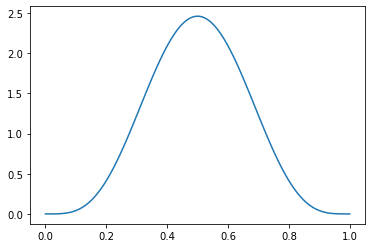

In [112]:
# Data
flips = np.array([1, 0, 1, 0, 1, 0, 1, 0])
m = np.sum(flips)
N = len(flips)

#MLE Estimate
mu_hat = np.mean(flips)
print("MLE Estimate of probability of heads: {}".format(mu_hat))

# Priors
a = 1
b = 1

# Bayesian Estimate
x = np.linspace(0, 1, 100)
plt.plot(x, scipy.stats.beta.pdf(x, a=m+a, b=N-m+b))